In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import cytoolz as tlz 
from plotnine import *

Reading the data

In [4]:
auto_df = pd.read_csv('data/ISLR_Auto.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Understanding the data types in the dataset

In [5]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


The first 6 rows of the `auto_df` dataset shows that the variable `horsepower` has numeric values but according to the output from the `info()` function python is interpreting as an **object** which in python in this particular case is a string.

We will convert any value that is a string in `horsepower` to a `NaN` where `NaN` means _Not a Number_.

In [6]:
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


Taking a closer look into those rows that are `NaN`s

In [7]:
auto_df[np.isnan(auto_df['horsepower'].values)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


So it appears that there are 5 rows under `horsepower` that has `NaN`s, let's fill in the `NaN`s with the mean of the column `horsepower`

In [8]:
avg_horsepower = auto_df['horsepower'].mean()
auto_df['horsepower'] = auto_df['horsepower'].fillna(avg_horsepower)

Now let's look at the summary of our data

In [9]:
auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.247388,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,76.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,95.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Ploting `Horsepower` against `mpg`

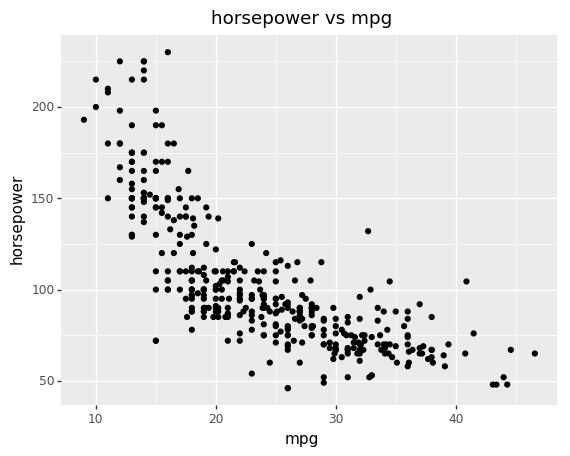

<ggplot: (305395790)>

In [10]:
(
    ggplot(auto_df) 
    + geom_point(aes(x='mpg', y='horsepower'))
    + labs(
        title ='horsepower vs mpg',
        x = 'mpg',
        y = 'horsepower',
    )
)

Ploting `Horsepower` against `weight`

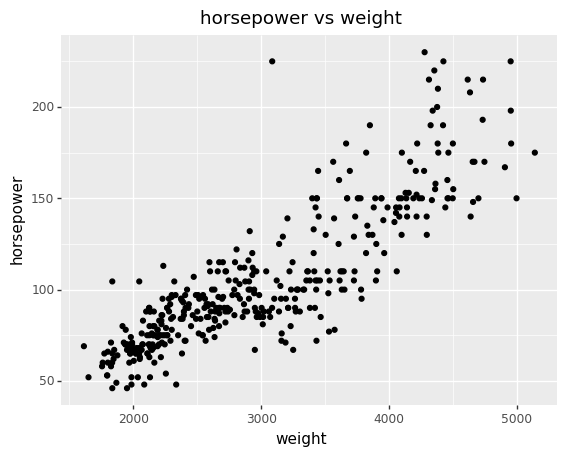

<ggplot: (305417378)>

In [11]:
(
    ggplot(auto_df) 
    + geom_point(aes(x='weight', y='horsepower'))
    + labs(
        title ='horsepower vs weight',
        x = 'weight',
        y = 'horsepower',
    )
)

#### Defining a  function to return $\hat{y}$

In [38]:
def y_hat(X: np.ndarray, theta: np.ndarray) -> np.ndarray:
    return np.dot(X, theta)

#### Defining the cost function (MSE)

In [37]:
def cost(yhat: np.ndarray, y: np.ndarray) -> np.float64:
    m = len(y)
    return (1/2*m) * np.sum(np.square(yhat - y))

#### Defining the algorithm for gradient descent as a function

In [39]:
def gradient_descent(X: np.ndarray, y: np.ndarray, theta: np.ndarray, alpha = 0.01, max_iters = 100):
    m = len(y)
    cost_history = np.zeros(max_iters)
    
    for i in range(max_iters):
        # Compute the predicted y_hat
        yhat = y_hat(X, theta)
        
        # Compute the gradient 
        delta = (1/m) * np.dot(X.T, (yhat - y))
        
        # Update the values of our thetas
        theta = theta - alpha * delta
        
        # Compute the value of our cost function
        # Keep track of the cost at each iteration
        cost_history[i] = cost(yhat, X)
        
    return theta.T, cost_history

#### Defining another version of the gradient descent function

This version of the gradient descent function uses a convergence threshold to stop iteration when the difference between the initial cost value and the subsequent cost value is equal to or greater than some user specified threshold value 

In [40]:
def gradient_descent2(X: np.ndarray, y: np.ndarray, theta: np.ndarray, alpha = 0.01, conv_threshold = 0.01, max_iters = 100):
    m = len(y)
    curr_iter = 1
    yhat = y_hat(X, theta)
    init_cost =  cost(y)
    cost_history = np.array([init_cost])
    converged = False
    
    while not converged:
        # Compute the gradient 
        delta = (1/m) * np.dot(X.T, (yhat - y))
        
        # Update the values of our thetas
        theta = theta - alpha * delta
        
        # Compute the next predicted yhat
        yhat = y_hat(X, theta)
        
        # Compute the value of our cost function
        new_cost = cost(yhat, X)
        
        reached_threshold <- (np.abs(init_cost - new_cost) >= conv_threshold)
        
        if not reached_threshold or curr_iter < max_iter:
            curr_iter = curr_iter + 1
            cost_history[curr_iter] = new_cost
        else:
            converged = True
            
    
    return theta.T, cost_history

#### Representing the Data for Imputation
Let's represent the values for `horsepower`, `weight`, `mpg` in a way that can be inputed into our gradient descent algorithm

In [28]:
target_shape = (len(auto_df), 1)
y = auto_df['horsepower'].values.reshape(target_shape)

X0 = np.ones(target_shape)
X1 = auto_df['mpg'].values.reshape(target_shape) 
X2 = auto_df['weight'].values.reshape(target_shape) 
X = np.c_[X0, X1, X2]

Let's look at th shape of our $y$ and $X$

In [30]:
print(f'Shape of y {y.shape}')
print(f'Shape of X {X.shape}')

Shape of y (397, 1)
Shape of X (397, 3)


We now need to generate initial values for our $\theta$s. We do this because it serves as a starting point for our optimizer to begin with. The optimizers role is to update the values of these $\theta$s if there are not the best possible values

In [31]:
# Set the seed to ensure predictable results
np.random.seed(123)

n_samples, n_features = X.shape
init_theta = np.random.randn(n_features, 1)
print(f'Shape of 𝜃 {init_theta.shape}')

Shape of 𝜃 (3, 1)


Let's get the first 10 values of our input data $y$, $X$, and $\theta$

##### $y$

In [32]:
y[:10]

array([[130.],
       [165.],
       [150.],
       [150.],
       [140.],
       [198.],
       [220.],
       [215.],
       [225.],
       [190.]])

##### $X$

In [22]:
X[:10]

array([[1.000e+00, 1.800e+01, 3.504e+03],
       [1.000e+00, 1.500e+01, 3.693e+03],
       [1.000e+00, 1.800e+01, 3.436e+03],
       [1.000e+00, 1.600e+01, 3.433e+03],
       [1.000e+00, 1.700e+01, 3.449e+03],
       [1.000e+00, 1.500e+01, 4.341e+03],
       [1.000e+00, 1.400e+01, 4.354e+03],
       [1.000e+00, 1.400e+01, 4.312e+03],
       [1.000e+00, 1.400e+01, 4.425e+03],
       [1.000e+00, 1.500e+01, 3.850e+03]])

##### $\theta$

In [23]:
init_theta[:10]

array([[-1.0856306 ],
       [ 0.99734545],
       [ 0.2829785 ]])

#### Training with gradient descent

In [42]:
max_iters = 1000

theta, cost_history = gradient_descent(X, y, init_theta, alpha=1e-6, max_iters=max_iters)

theta_df = pd.DataFrame(theta, columns=['𝜃0', '𝜃1', '𝜃2'])

print(theta_df)
print('\nFinal cost(MSE):  {:0.3f}'.format(cost_history[-1]))

data_df = pd.DataFrame({
    'iterations' : list(range(max_iters)),
    'cost' : cost_history
})

(
    ggplot(data_df, aes(x = 'iterations', y = 'cost'))
    + geom_point()
)

/Users/nickmuoh/Developer/Learning/ML-Adventures/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nickmuoh/Developer/Learning/ML-Adventures/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nickmuoh/Developer/Learning/ML-Adventures/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


   𝜃0  𝜃1  𝜃2
0 NaN NaN NaN

Final cost(MSE):  nan


/Users/nickmuoh/Developer/Learning/ML-Adventures/.venv/lib/python3.7/site-packages/mizani/breaks.py:848: RuntimeWarning: overflow encountered in double_scalars
  cm = coverage_max(dmin, dmax, step*(k-1))
/Users/nickmuoh/Developer/Learning/ML-Adventures/.venv/lib/python3.7/site-packages/mizani/breaks.py:861: RuntimeWarning: overflow encountered in double_scalars
  lmin = start * (step/j)
/Users/nickmuoh/Developer/Learning/ML-Adventures/.venv/lib/python3.7/site-packages/mizani/breaks.py:862: RuntimeWarning: overflow encountered in double_scalars
  lmax = lmin + step*(k-1)
/Users/nickmuoh/Developer/Learning/ML-Adventures/.venv/lib/python3.7/site-packages/mizani/breaks.py:759: RuntimeWarning: invalid value encountered in double_scalars
  return 2 - max(r/rt, rt/r)


KeyboardInterrupt: 